# Random Forest Model

A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. 
A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.  

A random forest eradicates the limitations of a decision tree algorithm. It reduces the overfitting of datasets and increases precision.  


Splits due to entropy gain  (entropy is the information measured)  
Class labels are assigned on a leaf node  
Slight change in a dataset in the data changes the whole tree 
Training depenedent data  
Senstive to training data  

However, We can reduce this senstiivty to get more precise results  
We can make multiple random trees, this is called forest  
This model is called Random Forest  

In Random Forest what we catually do is:
-We create multiple dataset from main dataset
-Same number of rows are converted into different datasets, this random sampling and replacing is called bootstraping.

KEY POINTS:  
It’s more accurate than the decision tree algorithm.
It provides an effective way of handling missing data.
It can produce a reasonable prediction without hyper-parameter tuning.
It solves the issue of overfitting in decision trees.
In every random forest tree, a subset of features is selected randomly at the node’s splitting point.
    

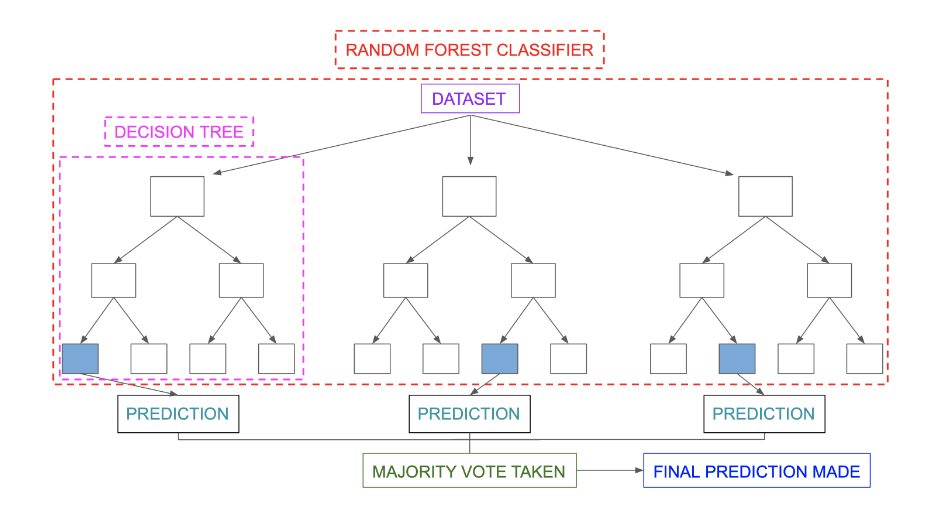

# Load Sample Dataset

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

# df = sns.load_dataset('Iris')
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
X = df.iloc[ : , 1 :-1]
y = df.iloc[ : ,-1 :]

In [25]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) 
# NOTE: n_estimators are used to specify the number of trees in the random forest

model.fit(X, y)

C:\Users\FAHADB~1\AppData\Local\Temp/ipykernel_18332/1392248781.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


RandomForestClassifier()

In [28]:
model.predict([[5,4,2,6]])

array(['Iris-setosa'], dtype=object)

In [30]:
model.predict([[10,4,20,6]])

array(['Iris-virginica'], dtype=object)

# Accuracy Score

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

predicitons = model.predict(X_test)
predicitons

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [32]:
score = model.score(X_test, y_test)
print("The accuracy score is : ", score)

The accuracy score is :  1.0


In [33]:
from sklearn import metrics

print("Accuracy is : ", metrics.accuracy_score(y_test, predicitons))


Accuracy is :  1.0


In [34]:
cm = metrics.confusion_matrix(y_test, predicitons)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Heat Map for Confusion Matrix

<AxesSubplot:>

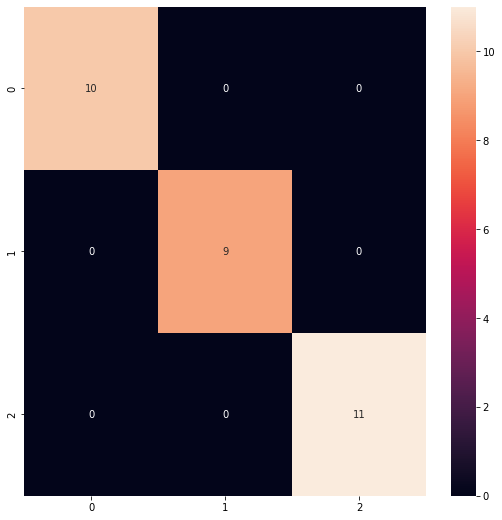

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True )